Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [8]:
%matplotlib inline
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [31]:
#Using Allens's thinkstats2.Pmf function to create the pmf 
#from the dataframe
pmf = thinkstats2.Pmf(resp['numkdhh'], label='actual')

Display the PMF.

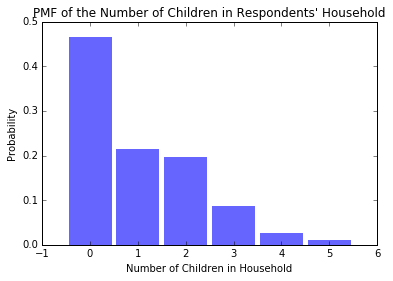

In [32]:
thinkplot.Hist(pmf)
plt.xlabel('Number of Children in Household')
plt.ylabel('Probability')
plt.title('PMF of the Number of Children in Respondents\' Household')

Define <tt>BiasPmf</tt>.

In [33]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [34]:
biasedPmf = BiasPmf(pmf, label='observed')

Display the actual Pmf and the biased Pmf on the same axes.

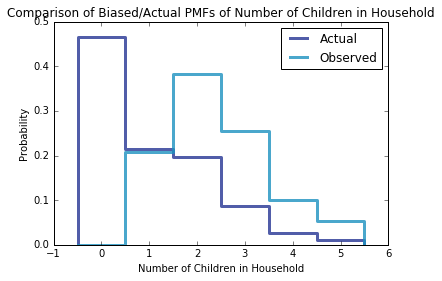

In [36]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biasedPmf])

plt.legend(['Actual', 'Observed'])
plt.xlabel('Number of Children in Household')
plt.ylabel('Probability')
plt.title('Comparison of Biased/Actual PMFs of Number of Children in Household')


Compute the means of the two Pmfs.

In [43]:
actualMean = pmf.Mean()
biasedMean = baisedPmf.Mean()
print 'Actual Mean: ', actualMean
print 'Baised Mean: ', biasedMean

Actual Mean:  1.02420515504
Baised Mean:  2.40367910066


### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

First, let's read in all the preg data. 

In [76]:
import nsfg
#read in preg data
preg = nsfg.ReadFemPreg()
#Get only the live births
preg = preg[preg.outcome == 1]

The MakePregMap function creates a dictionary of case ids to the list of indicies in the preg df. So, we can select all of these pregancies where the list is longer than two. 

In [80]:
#Create the preg map
pregMap = nsfg.MakePregMap(preg)
#Filter out women who have only had one pregnancy. 

pregMap = {key: pregMap[key]
           for key in pregMap.keys() if len(pregMap[key]) > 1 }

Now that we have this, we need to calculate the difference in time between first babies and other babies for each woman

In [78]:
diffs = []
for resp in pregMap.keys():
    #pull out the rows in the dataframe we care about and get 
    #the length of pregnancy  (weeks)
    pregrows = preg.loc[pregMap[resp]]['prglngth'].tolist()
    #Get the data for the first pregnancy
    firstPregLength = pregrows[0]
    #loop over the rest of the rows and compute the difference in 
    #pregnancy length. 
    for otherPregLength in  pregrows[1:]:
        #Get the diff
        lengthDiff = firstPregLength - otherPregLength
        diffs.append(lengthDiff)

[0,
 0,
 0,
 0,
 -2,
 -4,
 4,
 0,
 0,
 0,
 2,
 0,
 12,
 4,
 2,
 0,
 0,
 -1,
 5,
 2,
 0,
 1,
 -1,
 -1,
 1,
 3,
 -4,
 -2,
 0,
 0,
 0,
 0,
 2,
 0,
 -10,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 4,
 1,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -9,
 -9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -4,
 -4,
 2,
 0,
 0,
 0,
 -1,
 -4,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 31,
 0,
 0,
 2,
 1,
 0,
 0,
 -5,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 -3,
 -9,
 -1,
 -11,
 -2,
 -16,
 -15,
 4,
 -4,
 3,
 0,
 1,
 6,
 0,
 0,
 4,
 0,
 0,
 0,
 -4,
 -2,
 0,
 0,
 2,
 -6,
 0,
 0,
 -2,
 2,
 1,
 -4,
 -4,
 0,
 9,
 0,
 -3,
 0,
 -1,
 1,
 0,
 1,
 -2,
 0,
 0,
 4,
 1,
 -3,
 -1,
 2,
 2,
 -7,
 -1,
 0,
 0,
 -2,
 0,
 2,
 -6,
 0,
 -3,
 0,
 2,
 0,
 0,
 2,
 2,
 3,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 6,
 -7,
 -1,
 2,
 -2,
 1,
 -2,
 -4,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 -1,
 -3,
 2,
 0,
 -3,
 0,
 0,
 -2,
 -2,
 -10,
 -

Now, to create and plot the PMF. 

[-10, 10, 0, 0.6]

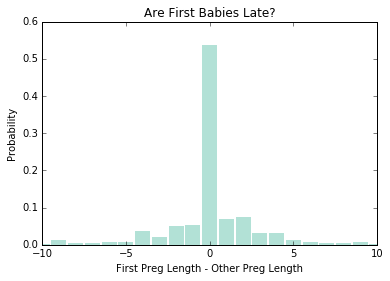

In [89]:
diffPmf = thinkstats2.Pmf(diffs)
thinkplot.Hist(diffPmf)
plt.xlabel(
    'First Preg Length - Other Preg Length')
plt.ylabel('Probability')
plt.title('Are First Babies Late?')
plt.axis([-10, 10, 0, 0.6])

Here, the vast majority of women have 0 difference in length between first and second babies. After that, it appears that more women have their first pregnancies are 1-2 weeks longer than subsequent pregnancies, than having first pregnancies be 1-2 weeks shorter. So, I guess, it appears that while most of the time first babies aren't late, they're a touch more likely to be late than early. 

Interestingly, it appears that there's a spike in number of women whose first babies are 4 weeks earlier than at least some of their subsequent pregnancies

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.